In [142]:
import c3d 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
from scipy.signal import correlate, correlation_lags
import os
import pickle

with open('2.IMU_Joint_Angles.pkl', 'rb') as f:
    IMU = pickle.load(f)

with open('3.OPTO_Joint_Angles.pkl', 'rb') as f:
    OPTO = pickle.load(f)


In [47]:
#### Align OPTO and IMU data

# use a combination of joint/axes to align the data
alignment_dict = {
    0: {'Joint': 'Right Elbow', 'Axis': 0},
    1: {'Joint': 'Right Elbow', 'Axis': 1},
    2: {'Joint': 'Right Shoulder', 'Axis': 0},
    3: {'Joint': 'Right Shoulder', 'Axis': 2},
    4: {'Joint': 'Right Shoulder', 'Axis': 1},
    5: {'Joint': 'Right Wrist', 'Axis': 0},
    6: {'Joint': 'Right Wrist', 'Axis': 2},
    7: {'Joint': 'Right Elbow', 'Axis': 0},
    8: {'Joint': 'Right Elbow', 'Axis': 0},
    9: {'Joint': 'Right Elbow', 'Axis': 0},
}


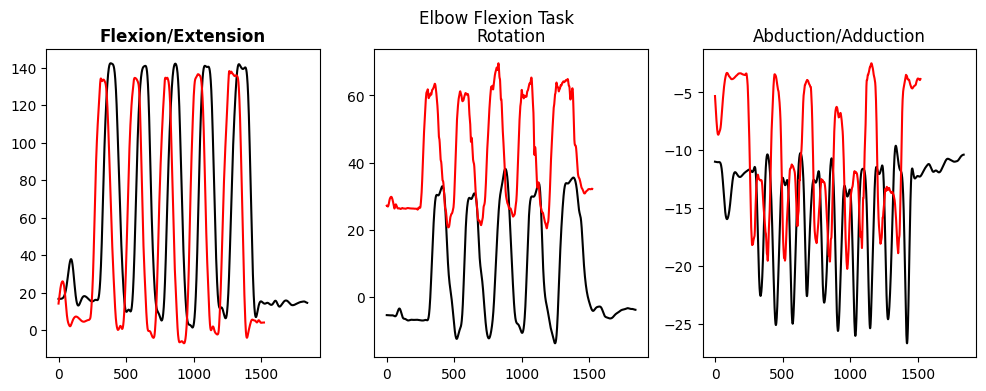

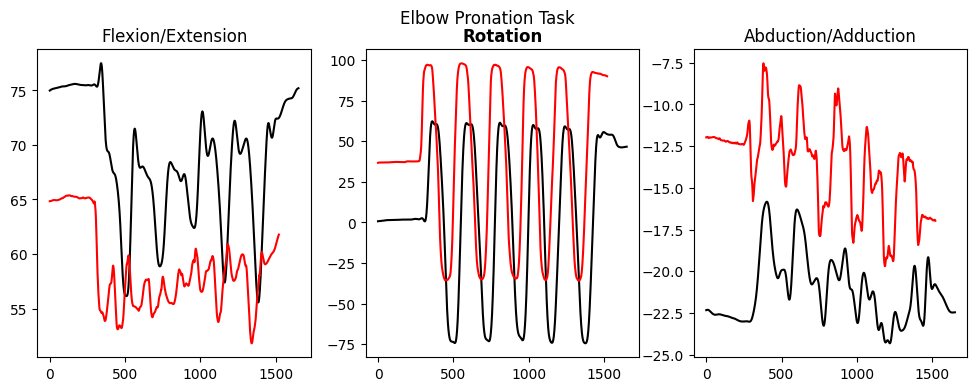

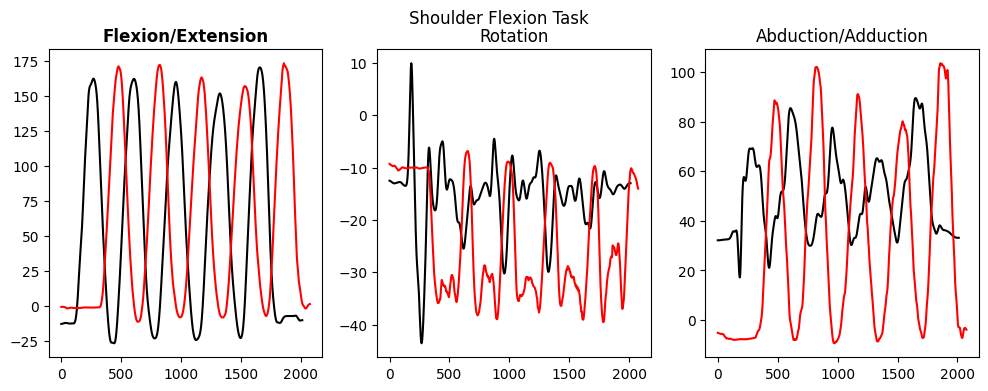

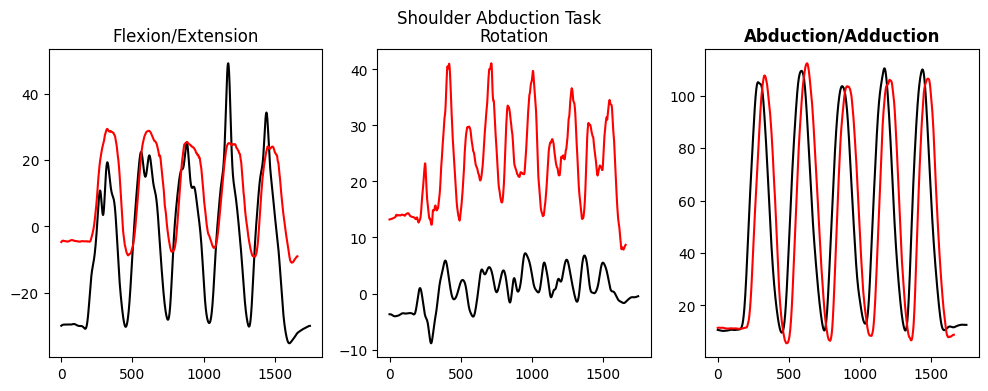

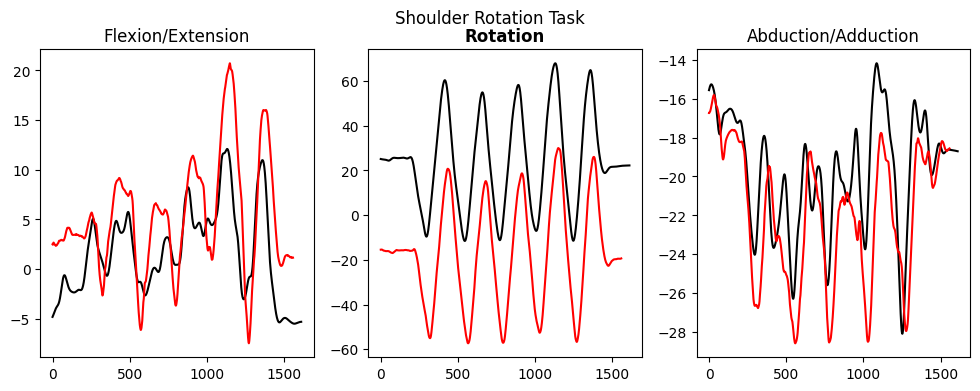

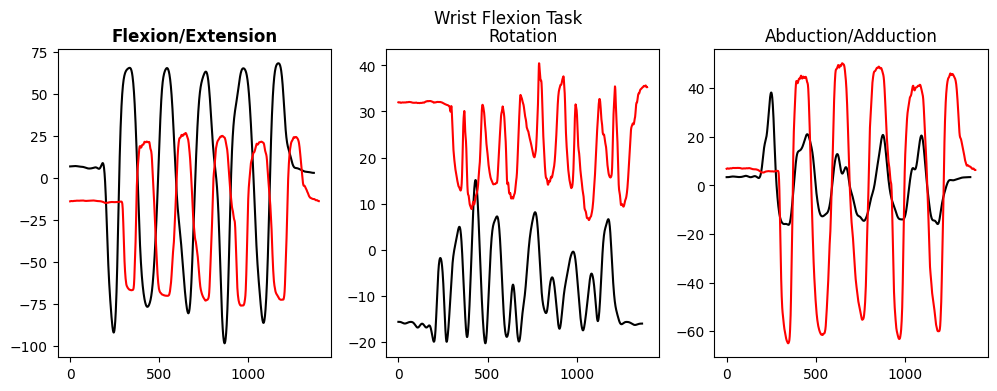

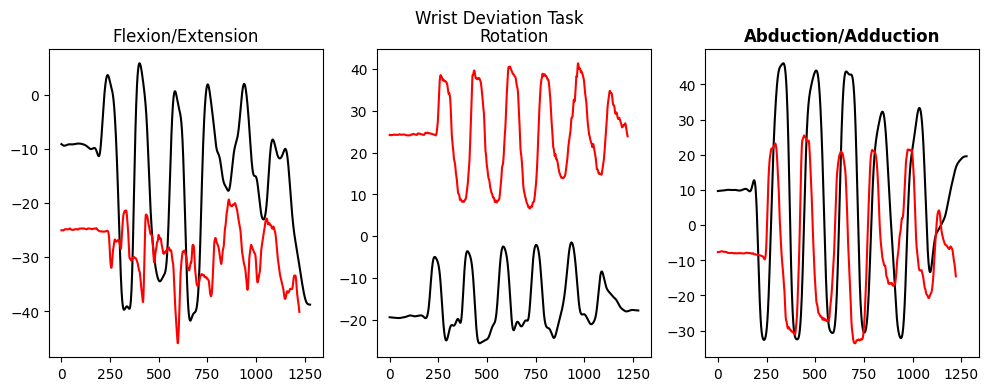

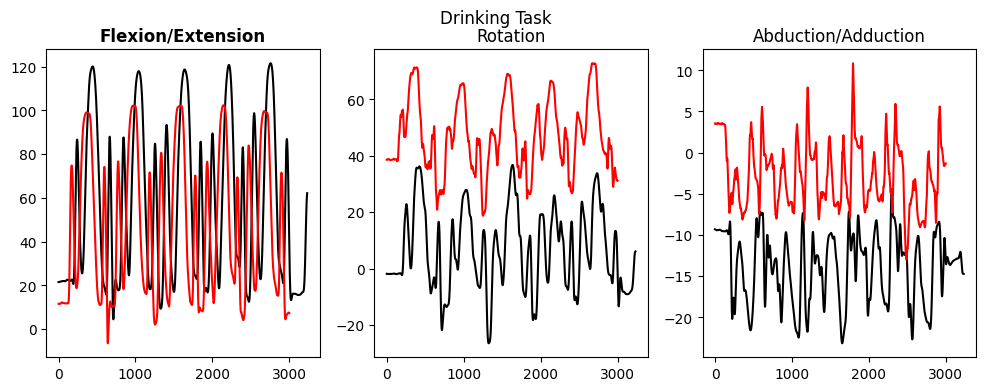

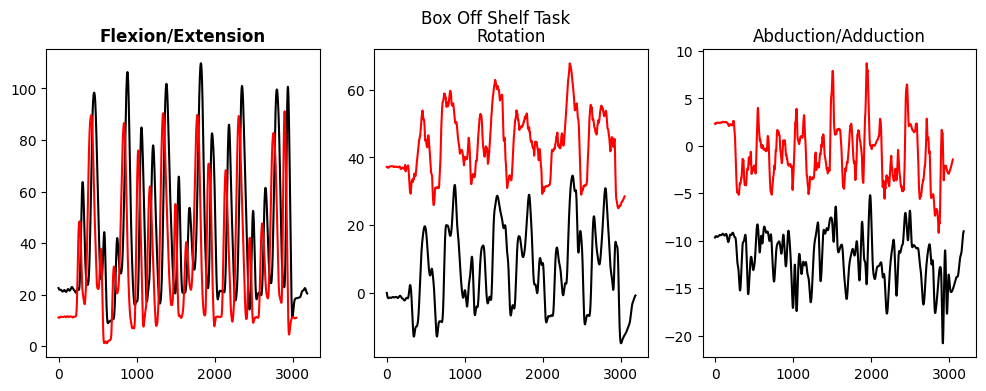

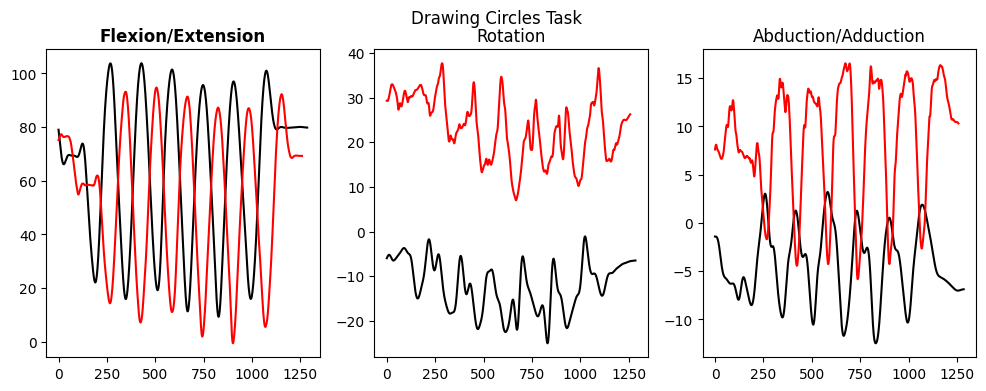

In [48]:
#### Plot data before the aligment
for task in range(len(alignment_dict)):
    joint = alignment_dict[task]['Joint']
    
    imu = IMU[task][joint]
    opto = OPTO[task][joint]
    taskName = IMU[task]['Task Name']
    
    fig, axList = plt.subplots(1,3,figsize=(12,4))
    fig.suptitle(taskName)
    jointAxesNames = ['Flexion/Extension', 'Rotation', 'Abduction/Adduction']
    for i in range(3):
        axList[i].plot(opto[:,i], color='black', label='OPTO')
        axList[i].plot(imu[:,i], color='red', label='IMU N-Pose')
        axList[i].set_title(jointAxesNames[i])
        if i == alignment_dict[task]['Axis']:
            axList[i].set_title(jointAxesNames[i], fontweight='bold')

The time lag between the signals is 63 frames


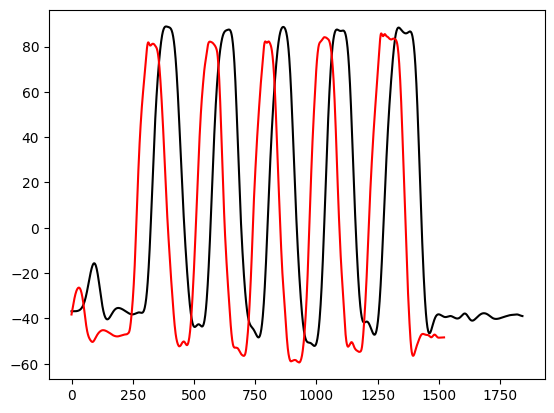

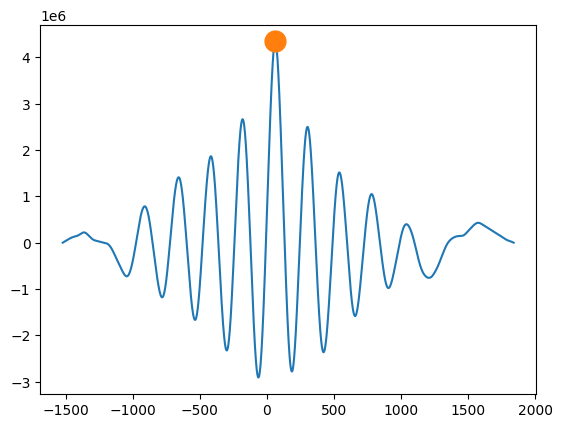

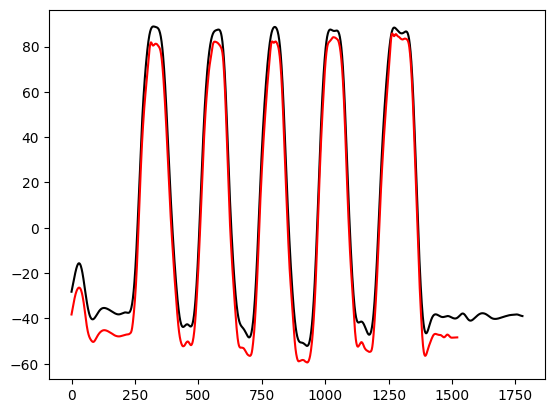

In [154]:
## Cross-correlation of two signals
task = 0
joint = alignment_dict[task]['Joint']
axis = alignment_dict[task]['Axis']

imu = IMU[task][joint][:,axis]
opto = OPTO[task][joint][:,axis]

imu = imu - np.mean(imu)
opto = opto - np.mean(opto)

maxOpto = np.argmax(opto)
maxImu = np.argmax(imu)
lag1 = maxOpto - maxImu
# print(f'lag with max = {lag1}')
plt.plot(opto, color='black')
# plt.plot(maxOpto,opto[maxOpto], marker='o', markersize=15)
plt.plot(imu, color='red')
# plt.plot(maxImu,imu[maxImu], marker='o', markersize=15)

correlation = correlate(opto, imu, mode='full', method='direct')
lags = correlation_lags(opto.size, imu.size, mode='full')
lag = lags[np.argmax(correlation)]

# time_lag = lag_vector[max_index]  # Convert samples to time
print(f"The time lag between the signals is {lag} frames")

plt.figure()
plt.plot(lags, correlation)
plt.plot(lags[np.argmax(correlation)], correlation[np.argmax(correlation)], marker='o', markersize=15)


plt.figure()
plt.plot(opto[lag:], color='black')
plt.plot(imu, color='red')


### Now we need to find the matching indices to align all signals